In [7]:

import seaborn as sns
import pandas as pd
import scipy.stats as stats

df = pd.read_csv('C:\\Users\\ryans\\OneDrive\\Desktop\\Briefcase\\PDFs\\1-ALL PYTHON & R CODE SAMPLES\\A - GITHUB\\Accuracies of Different Regressors - Housing Prices\\house.csv')
df.head()

#sf.drop(sf.columns[[0, 2, 3, 15, 17, 18]], axis=1, inplace=True)
df.info()

df['zindexvalue'] = df['zindexvalue'].str.replace(',', '')
df['zindexvalue'] = df['zindexvalue'].astype(str).astype(int)

df.lastsolddate.min(), df.lastsolddate.max()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        11330 non-null  object 
 1   info           11330 non-null  object 
 2   z_address      11330 non-null  object 
 3   bathrooms      11330 non-null  float64
 4   bedrooms       11330 non-null  int64  
 5   finishedsqft   11330 non-null  int64  
 6   lastsolddate   11330 non-null  object 
 7   lastsoldprice  11330 non-null  int64  
 8   latitude       11330 non-null  float64
 9   longitude      11330 non-null  float64
 10  neighborhood   11330 non-null  object 
 11  totalrooms     11330 non-null  int64  
 12  usecode        11330 non-null  object 
 13  yearbuilt      11330 non-null  int64  
 14  zestimate      11330 non-null  int64  
 15  zindexvalue    11330 non-null  object 
 16  zipcode        11330 non-null  int64  
 17  zpid           11330 non-null  int64  
dtypes: flo

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zindexvalue,zipcode,zpid
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,1.133000e+04,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.565695e+06,1.320205e+06,94116.912004,3.689973e+07
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,1.229417e+06,5.848170e+05,9.400877,7.800741e+07
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,6.881000e+05,94102.000000,1.506329e+07
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.052375e+05,9.829000e+05,94110.000000,1.510847e+07
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.230758e+06,1.211900e+06,94115.000000,1.515697e+07
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.731170e+06,1.480400e+06,94123.000000,5.970040e+07
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,1.553325e+07,5.333500e+06,94158.000000,2.146999e+09


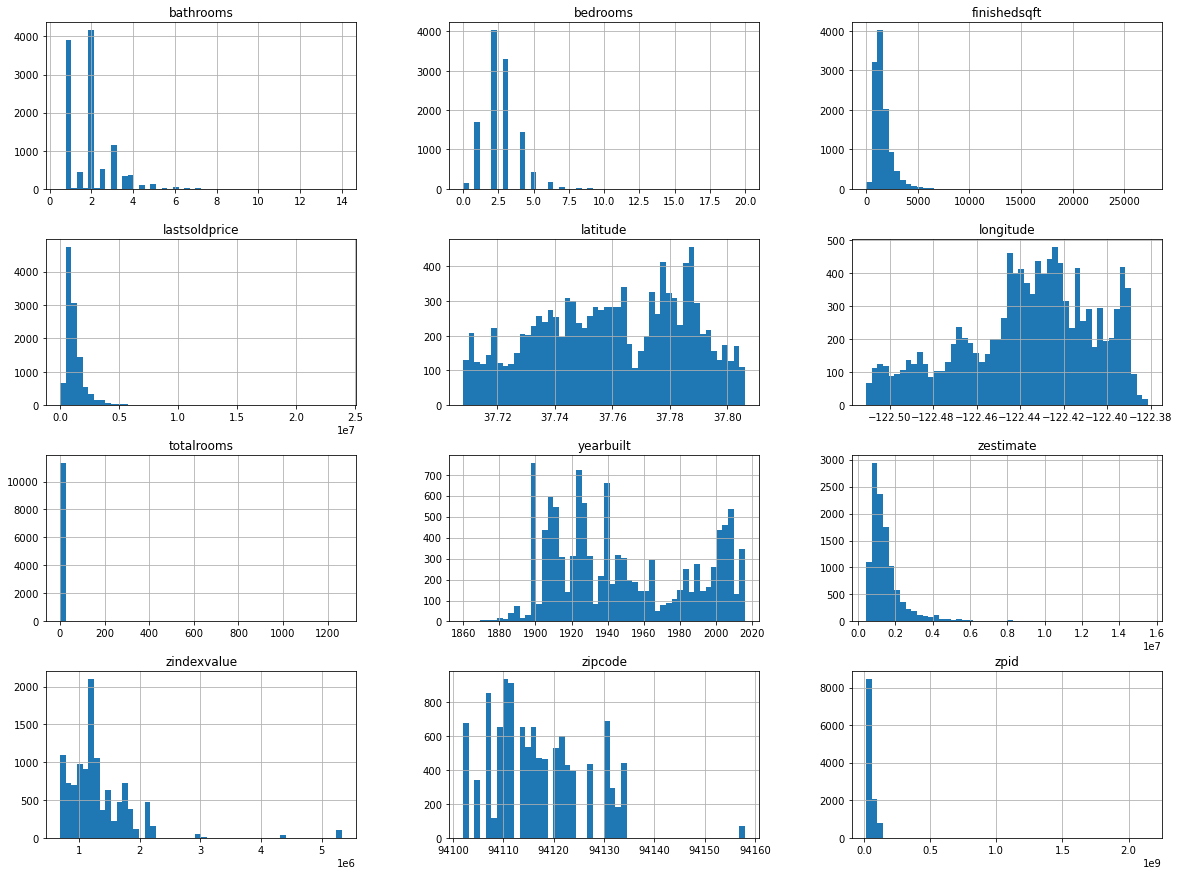

In [8]:

import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()


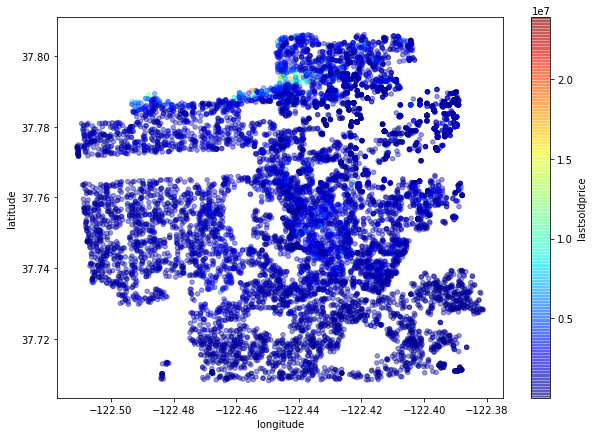

In [9]:

df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="lastsoldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)


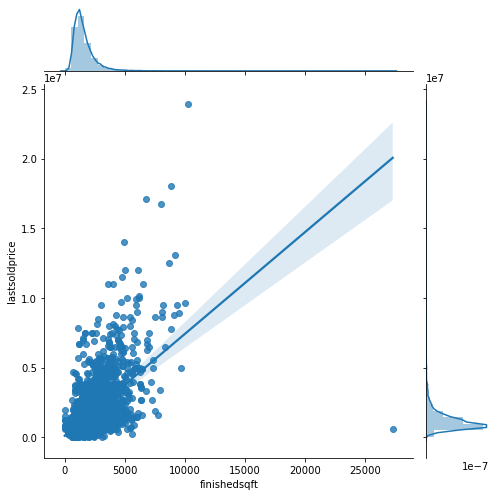

In [10]:

sns.jointplot(x="finishedsqft", y="lastsoldprice", data=df, kind = 'reg',fit_reg= True, size = 7)
plt.show()


In [13]:

# select only numerics into new dataframe
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_new = df.select_dtypes(include=numerics)
list(df_new)


['bathrooms',
 'bedrooms',
 'finishedsqft',
 'lastsoldprice',
 'latitude',
 'longitude',
 'totalrooms',
 'yearbuilt',
 'zestimate',
 'zindexvalue',
 'zipcode',
 'zpid']

In [14]:

list(df_new)

X = df[['bathrooms',
         'bedrooms',
         'finishedsqft',
         'latitude',
         'longitude',
         'totalrooms',
         'yearbuilt',
         'zestimate',
         'zindexvalue',
         'zipcode']]
Y = df['lastsoldprice']


X.head()


,bathrooms,bedrooms,finishedsqft,latitude,longitude,totalrooms,yearbuilt,zestimate,zindexvalue,zipcode
0,2.0,2,1043,37.778705,-122.412635,4,2007,1167508,975700,94103
1,1.0,1,903,37.777641,-122.393417,3,2004,823719,975700,94107
2,4.0,3,1425,37.759198,-122.396516,6,2003,1708594,1277600,94107
3,3.0,3,2231,37.761886,-122.396769,10,1927,2411236,1277600,94107
4,3.0,3,1300,37.740795,-122.413453,4,1900,1918539,1248000,94110


In [22]:

# train and build a linear regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Linear Regression R^2": %.4f' % regressor.score(X_test, y_test))


Linear Regression R^2": 0.7151


In [23]:

import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)


Linear Regression RMSE: 496855.2284
Linear Regression MAE: 275945.8041


In [24]:

from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)
print('Decision Tree R^2": %.4f' % clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
tree_mse = mean_squared_error(y_pred, y_test)
tree_rmse = np.sqrt(tree_mse)
print('Decision Tree RMSE: %.4f' % tree_rmse)

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)


Decision Tree R^2": 0.6198
Decision Tree RMSE: 573959.9820
Linear Regression MAE: 321246.7705


In [25]:

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)
print('Random Forest R^2": %.4f' % forest_reg.score(X_test, y_test))
y_pred = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_pred, y_test)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest RMSE: %.4f' % forest_rmse)

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)


Random Forest R^2": 0.7875
Random Forest RMSE: 429112.1101
Linear Regression MAE: 244270.7071


In [26]:

from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train)
print('Nearest Neighbor R^2": %.4f' % neigh.score(X_test, y_test))
y_pred = neigh.predict(X_test)
nn_mse = mean_squared_error(y_pred, y_test)
nn_rmse = np.sqrt(nn_mse)
print('Nearest Neighbor RMSE: %.4f' % nn_rmse)

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)


Nearest Neighbor R^2": 0.6519
Nearest Neighbor RMSE: 549156.0550
Linear Regression MAE: 316870.5469


In [27]:

from sklearn import linear_model
reg = linear_model.Ridge(alpha=.5)
reg.fit(X_train, y_train)
print('Ridge Regression R^2": %.4f' % reg.score(X_test, y_test))
y_pred = reg.predict(X_test)
rr_mse = mean_squared_error(y_pred, y_test)
rr_rmse = np.sqrt(rr_mse)
print('Ridge Regression RMSE: %.4f' % rr_rmse)

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)


Ridge Regression R^2": 0.7151
Ridge Regression RMSE: 496860.2825
Linear Regression MAE: 275930.8844


In [28]:

from sklearn import linear_model
reg = linear_model.Lasso(alpha=0.1)
reg.fit(X_train, y_train)
print('Lasso Regression R^2": %.4f' % reg.score(X_test, y_test))
y_pred = reg.predict(X_test)
lr_mse = mean_squared_error(y_pred, y_test)
lr_rmse = np.sqrt(lr_mse)
print('Lasso Regression RMSE: %.4f' % lr_rmse)

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)


Lasso Regression R^2": 0.7151
Lasso Regression RMSE: 496854.5626
Linear Regression MAE: 275945.6374


In [29]:

# Gradient Boosting
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)
print('Gradient Boosting R^2": %.4f' % model.score(X_test, y_test))
y_pred = model.predict(X_test)
model_mse = mean_squared_error(y_pred, y_test)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)

lin_mae = mean_absolute_error(y_pred, y_test)
print('Linear Regression MAE: %.4f' % lin_mae)


Gradient Boosting R^2": 0.7777
Gradient Boosting RMSE: 438855.2405
Linear Regression MAE: 258195.7499


In [30]:

feature_labels = np.array(['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'yearbuilt', 'zindexvalue', 
                           'high_price_high_freq', 'high_price_low_freq', 'low_price', 'Apartment', 'Condominium', 'Cooperative', 
                          'Duplex', 'Miscellaneous', 'Mobile', 'MultiFamily2To4', 'MultiFamily5Plus', 'SingleFamily', 
                           'Townhouse'])
importance = model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))
    

Apartment-0.09%
high_price_high_freq-0.46%
low_price-0.53%
zindexvalue-0.59%
yearbuilt-0.60%
bathrooms-0.86%
totalrooms-1.16%
bedrooms-1.39%
finishedsqft-2.39%
high_price_low_freq-91.93%


In [ ]:

# Data:
# https://raw.githubusercontent.com/RuiChang123/Regression_for_house_price_estimation/master/final_data.csv
